TMA APPAREL SALES DATA

In [22]:
# Import pandas library
import pandas as pd

# Load the CSV file
file_path = "tma_apparel.csv" 
data = pd.read_csv(file_path)

# Display the first five rows
df = pd.read_csv("tma_apparel.csv")
df.head()



,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [18]:
df = pd.read_csv("tma_apparel.csv")
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


# Analyze the structure of the data

In [4]:
# Basic information about the dataset
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

# Data Cleaning

In [5]:
# Fill missing values in numeric columns with the median
data.fillna(data.median(numeric_only=True), inplace=True)

# Drop duplicate rows, if any
data.drop_duplicates(inplace=True)

# Verify cleaning
print(data.isnull().sum())


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


# Perform Exploratory Data Analysis (EDA)
#  Age Distribution

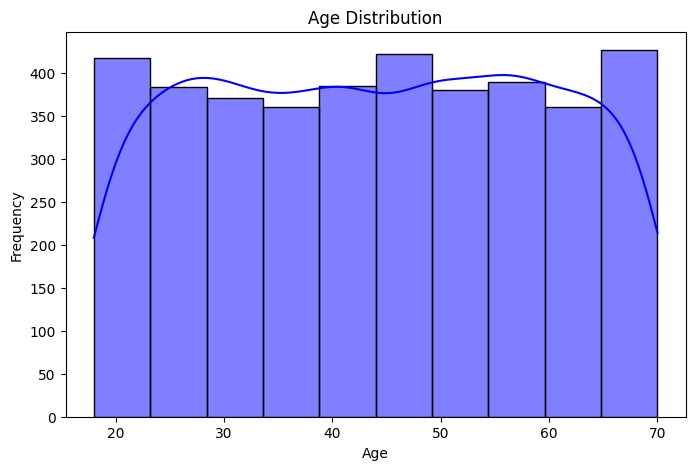

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Revenue Analysis
# Calculate total revenue and its distribution

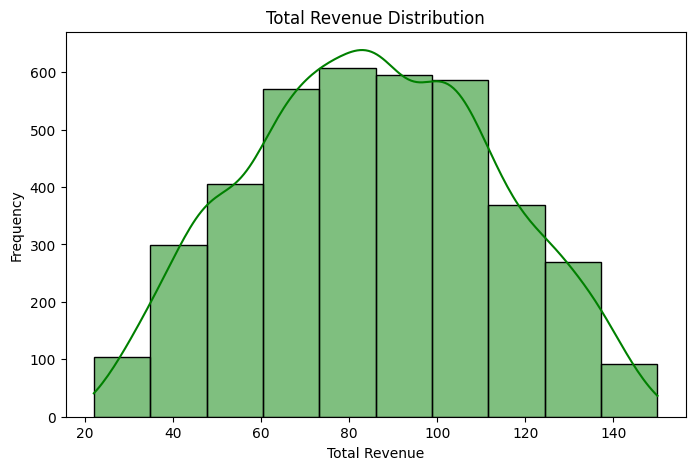

In [12]:
# Add a Total Revenue column
data['Total Revenue'] = data['Purchase Amount (USD)'] + data['Previous Purchases']

# Plot total revenue distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Total Revenue'], bins=10, kde=True, color='green')
plt.title("Total Revenue Distribution")
plt.xlabel("Total Revenue")
plt.ylabel("Frequency")
plt.show()


#  Age Group Analysis
# Create age groups and analyze revenue by age group

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_16808\2192054548.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = data.groupby('Age Group')['Total Revenue'].sum()


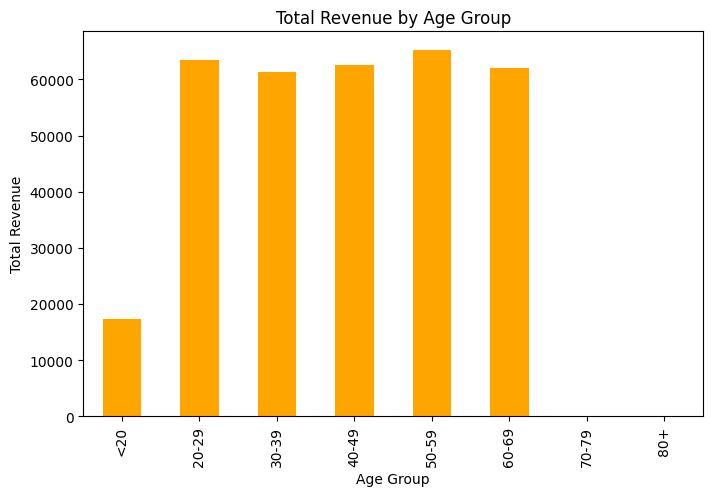

In [13]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Revenue by age group
age_group_revenue = data.groupby('Age Group')['Total Revenue'].sum()

# Plot revenue by age group
age_group_revenue.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Total Revenue by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Revenue")
plt.show()


# Gender-Based Analysis
# Analyze revenue by gender

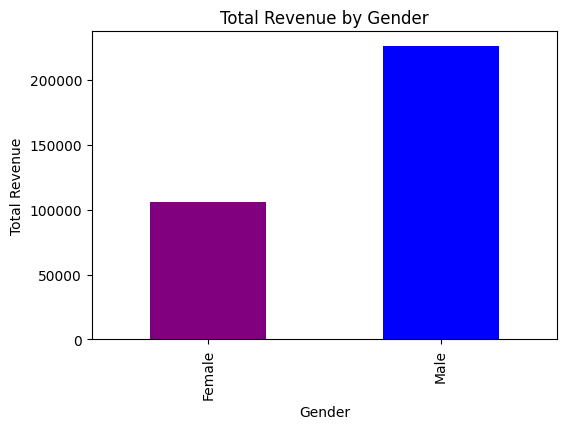

In [15]:
# Revenue by gender
gender_revenue = data.groupby('Gender')['Total Revenue'].sum()

# Plot revenue by gender
gender_revenue.plot(kind='bar', color=['purple', 'blue'], figsize=(6, 4))
plt.title("Total Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Revenue")
plt.show()


# Top 10 Customers by Revenue

In [17]:
top_customers = data.nlargest(10, 'Total Revenue')
print(top_customers[['Customer ID', 'Total Revenue']])


      Customer ID  Total Revenue
455           456            150
992           993            149
1847         1848            149
95             96            148
885           886            148
1737         1738            148
2271         2272            148
2842         2843            148
3746         3747            148
413           414            147
